# Alura Store: Análisis de Ventas y Rendimiento

### Introducción
El propósito de este análisis es identificar cuál de las cuatro tiendas está experimentando resultados negativos y mostrando una tendencia descendente en su rendimiento. A través del análisis de datos históricos, ventas, costos de envío y calificaciones de usuarios, se busca generar una recomendación que, como consecuencia, llevará a la venta de la tienda con peor desempeño y al inicio de un nuevo emprendimiento.

El estudio abarca la evaluación de datos anuales, trimestrales y de ganancias, junto con la reputación de cada tienda frente a los compradores. Además, se analizan los productos más vendidos y los menos solicitados, con el fin de orientar el nuevo emprendimiento hacia lo que realmente tiene mayor potencial de éxito.

### Importación de datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### 1. Análisis de facturación


In [ ]:
def calcular_ingreso_historico(nombre_tienda):
  return nombre_tienda['Precio'].sum()

def calcular_ingreso_mensual(nombre_tienda):
  nombre_tienda['Fecha de Compra'] = pd.to_datetime(nombre_tienda['Fecha de Compra'],dayfirst=True)
  nombre_tienda['Mes'] = nombre_tienda['Fecha de Compra'].dt.month
  nombre_tienda['Año'] = nombre_tienda['Fecha de Compra'].dt.year
  ingreso_mensual = nombre_tienda.groupby(['Año', 'Mes'])['Precio'].sum()
  return ingreso_mensual

def calcular_ingreso_trimestral(nombre_tienda):
  nombre_tienda['Fecha de Compra'] = pd.to_datetime(nombre_tienda['Fecha de Compra'],dayfirst=True)
  nombre_tienda['Mes'] = nombre_tienda['Fecha de Compra'].dt.month
  nombre_tienda['Año'] = nombre_tienda['Fecha de Compra'].dt.year
  nombre_tienda['Trimestre'] = nombre_tienda['Fecha de Compra'].dt.quarter
  ingreso_trimestral = nombre_tienda.groupby(['Año', 'Trimestre'])['Precio'].sum()
  return ingreso_trimestral

def calcular_ingreso_anual(nombre_tienda):
  nombre_tienda['Fecha de Compra'] = pd.to_datetime(nombre_tienda['Fecha de Compra'],dayfirst=True)
  nombre_tienda['Año'] = nombre_tienda['Fecha de Compra'].dt.year
  ingreso_anual = nombre_tienda.groupby('Año')['Precio'].sum()
  return ingreso_anual

#### Análisis de Tendencia Trimestral Anual por tienda
Si evaluamos la tendencia trimestral a lo largo de los años podemos ver un decrecimiento en los niveles de ingresos de las tiendas; mostrando que la tienda 1 como las demás tuvieron una caída evidente en sus ventas en los últimos años.


Ingresos Tienda 1:
Año
2020    368933200.0
2021    362120800.0
2022    316565600.0
2023    103260800.0
Name: Precio, dtype: float64

Ingresos Tienda 2:
Año
2020    320466600.0
2021    351215500.0
2022    358226500.0
2023     86434900.0
Name: Precio, dtype: float64

Ingresos Tienda 3:
Año
2020    321707500.0
2021    362954400.0
2022    350438300.0
2023     62919400.0
Name: Precio, dtype: float64

Ingresos Tienda 4:
Año
2020    330847700.0
2021    347823600.0
2022    302221500.0
2023     57482900.0
Name: Precio, dtype: float64


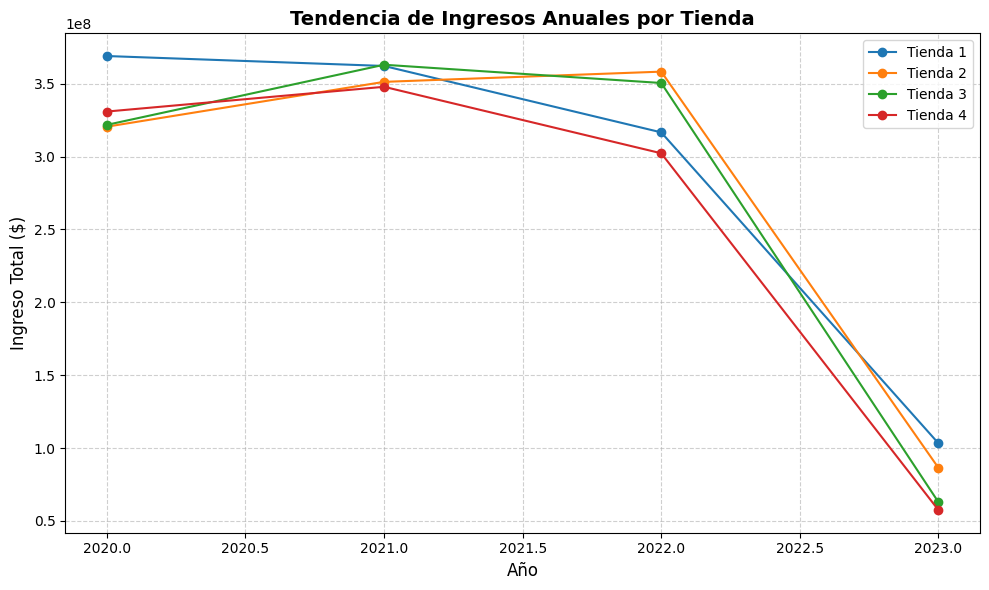

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Obtener los ingresos anuales por tienda
ingreso_anual_1 = calcular_ingreso_anual(tienda)
ingreso_anual_2 = calcular_ingreso_anual(tienda2)
ingreso_anual_3 = calcular_ingreso_anual(tienda3)
ingreso_anual_4 = calcular_ingreso_anual(tienda4)

# Imprimir los datos de ingreso anual por tienda
print("Ingresos Tienda 1:")
print(ingreso_anual_1)
print("\nIngresos Tienda 2:")
print(ingreso_anual_2)
print("\nIngresos Tienda 3:")
print(ingreso_anual_3)
print("\nIngresos Tienda 4:")
print(ingreso_anual_4)

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.plot(ingreso_anual_1.index, ingreso_anual_1.values, marker='o', label='Tienda 1')
plt.plot(ingreso_anual_2.index, ingreso_anual_2.values, marker='o', label='Tienda 2')
plt.plot(ingreso_anual_3.index, ingreso_anual_3.values, marker='o', label='Tienda 3')
plt.plot(ingreso_anual_4.index, ingreso_anual_4.values, marker='o', label='Tienda 4')

# Título y etiquetas
plt.title('Tendencia de Ingresos Anuales por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)

# Mostrar leyenda y grilla
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Ingresos Históricos por tienda
En este tramo se evalúa el ingreso histórico de las tiendas, siendo en este caso la Tienda 1 la que ha generado mayores ingresos en comparación con las demás.



*   **Ingreso histórico Tienda 1:** $1,150,880,400.0

*   **Ingreso histórico Tienda 2:** $1,116,343,500.0

*  **Ingreso histórico Tienda 3:** $1,098,019,600.0

*   **Ingreso histórico Tienda 4**: $1,038,375,700.0


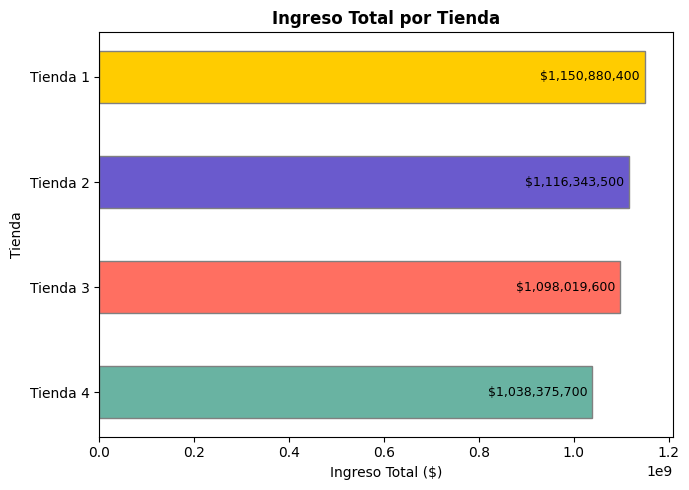

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculo de ingreso por tienda historico
ingresos = {
    'Tienda 1': calcular_ingreso_historico(tienda),
    'Tienda 2': calcular_ingreso_historico(tienda2),
    'Tienda 3': calcular_ingreso_historico(tienda3),
    'Tienda 4': calcular_ingreso_historico(tienda4)
}

df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])

# Ordenar de menor a mayor ingreso
df_ingresos.sort_values(by='Ingreso Total', ascending=True, inplace=True)

# Colores para las barras
colores = ['#69b3a2', '#ff6f61', '#6a5acd', '#ffcc00']

# Grafico de Barras
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.barh(df_ingresos['Tienda'], df_ingresos['Ingreso Total'],
               color=colores, edgecolor='gray', height=0.5)

# Titulos
plt.title('Ingreso Total por Tienda', fontsize=12, fontweight='bold')
plt.xlabel('Ingreso Total ($)', fontsize=10)
plt.ylabel('Tienda', fontsize=10)

for bar in bars:
    width = bar.get_width()
    ax.text(width - (width * 0.01), bar.get_y() + bar.get_height() / 2,
            f'${int(width):,}', ha='right', va='center', color='black',
            fontsize=9)

plt.tight_layout()
plt.show()



#### Tendencia Mensual del último año
Finalmente, se evaluaron los ingresos correspondientes a los últimos doce meses. La tienda 3 presentó una caída pronunciada en febrero, aunque en marzo evidenció una recuperación hacia los niveles previos. En cambio, la tienda 4 mostró una tendencia descendente sostenida en sus ingresos mensuales. Por su parte, la tienda 1 se destacó por mantener ingresos relativamente estables durante los dos últimos meses.

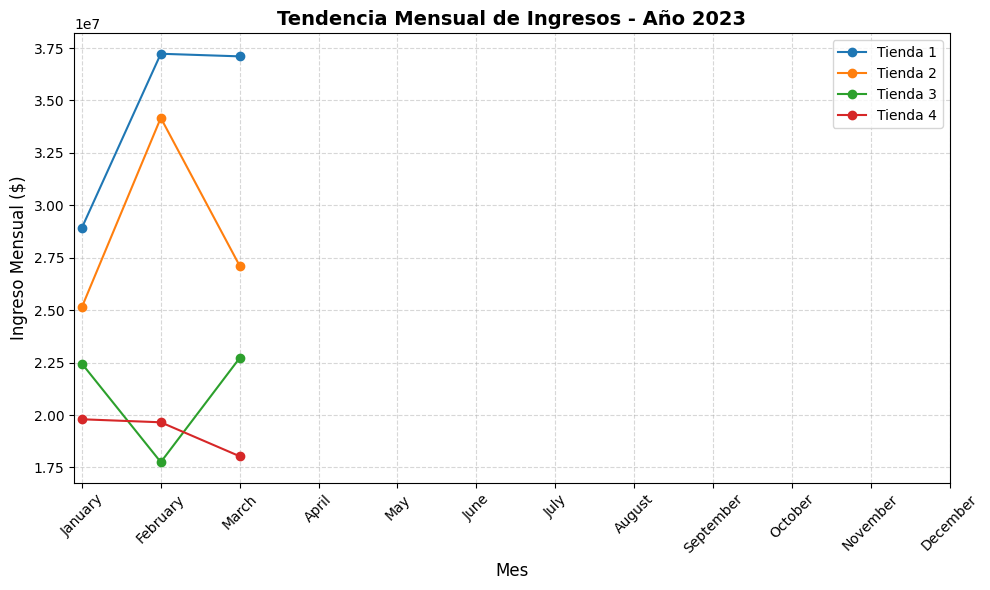

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import calendar

def calcular_ingreso_mensual(nombre_tienda):
    nombre_tienda['Fecha de Compra'] = pd.to_datetime(nombre_tienda['Fecha de Compra'], dayfirst=True)
    nombre_tienda['Mes'] = nombre_tienda['Fecha de Compra'].dt.month
    nombre_tienda['Año'] = nombre_tienda['Fecha de Compra'].dt.year
    ingreso_mensual = nombre_tienda.groupby(['Año', 'Mes'])['Precio'].sum().reset_index()
    return ingreso_mensual

# Calcular ingresos
mensual_1 = calcular_ingreso_mensual(tienda)
mensual_2 = calcular_ingreso_mensual(tienda2)
mensual_3 = calcular_ingreso_mensual(tienda3)
mensual_4 = calcular_ingreso_mensual(tienda4)

# Obtener el último año común
ultimo_anio = min(
    mensual_1['Año'].max(),
    mensual_2['Año'].max(),
    mensual_3['Año'].max(),
    mensual_4['Año'].max()
)

# Filtrar por el último año
mensual_1 = mensual_1[mensual_1['Año'] == ultimo_anio]
mensual_2 = mensual_2[mensual_2['Año'] == ultimo_anio]
mensual_3 = mensual_3[mensual_3['Año'] == ultimo_anio]
mensual_4 = mensual_4[mensual_4['Año'] == ultimo_anio]

# Crear gráfico
plt.figure(figsize=(10, 6))

plt.plot(mensual_1['Mes'], mensual_1['Precio'], marker='o', label='Tienda 1')
plt.plot(mensual_2['Mes'], mensual_2['Precio'], marker='o', label='Tienda 2')
plt.plot(mensual_3['Mes'], mensual_3['Precio'], marker='o', label='Tienda 3')
plt.plot(mensual_4['Mes'], mensual_4['Precio'], marker='o', label='Tienda 4')

# Etiquetas
plt.title(f'Tendencia Mensual de Ingresos - Año {ultimo_anio}', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Mensual ($)', fontsize=12)

# Nombres de los meses en el eje X
meses_nombre = [calendar.month_name[i] for i in range(1, 13)]
plt.xticks(range(1, 13), meses_nombre, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2. Ventas por categoría
Las categorías existentes en Alura Store son:
- Artículos del hogar
- Deportes y diversión
- Electrodomésticos
- Instrumentos musicales
- Juguetes
- Libros
- Muebles

In [ ]:
import pandas as pd

def ventas_por_categoria(nombre_tienda):
    return nombre_tienda['Categoría del Producto'].value_counts()

# Tiendas y sus ventas por categoría
ventas_tienda1 = ventas_por_categoria(tienda)
ventas_tienda2 = ventas_por_categoria(tienda2)
ventas_tienda3 = ventas_por_categoria(tienda3)
ventas_tienda4 = ventas_por_categoria(tienda4)

# DataFrame con las ventas por categoría para cada tienda
df_ventas = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0)


#### Comparación categorias entre Tiendas
Comparación de venta de categorías entre las 4 tiendas, en este caso vemos los ingresos generados que son los más altos en la categoría muebles y electronicos.
Podemos ver que hay una mayor venta de productos electronicos, electrodomesticos y muebles de forma pareja entre las tiendas.

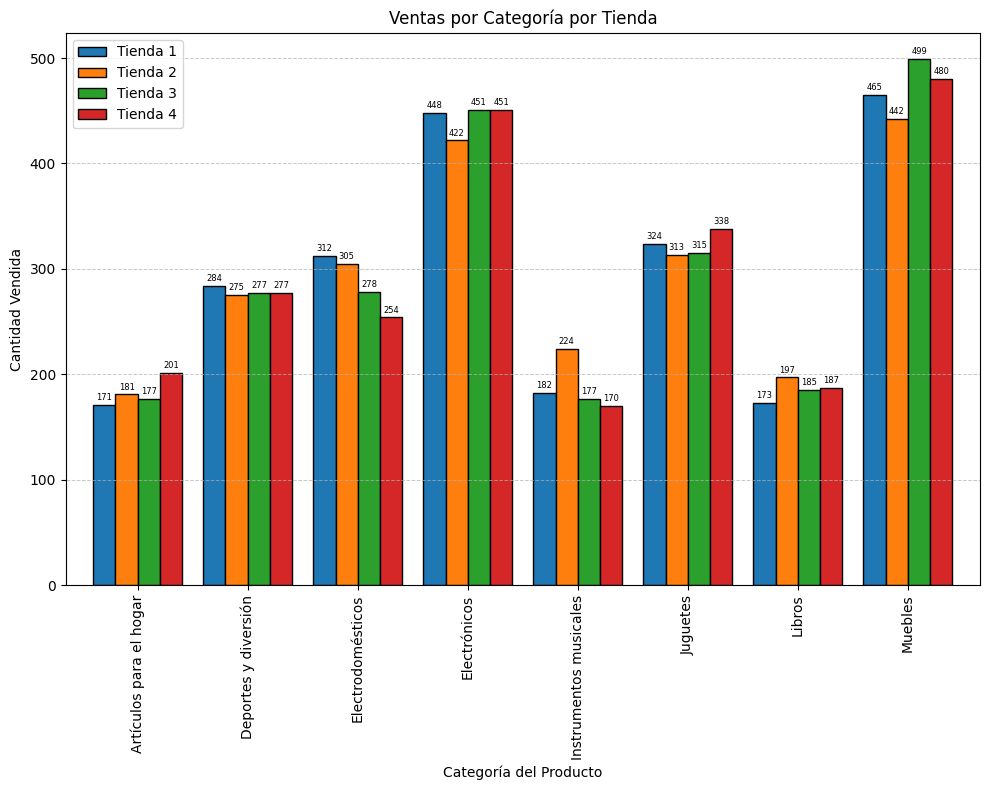

In [ ]:
import matplotlib.pyplot as plt

ax = df_ventas.plot(kind='bar', figsize=(10, 8), edgecolor='black', width=0.81)

# Título y etiquetas
plt.title('Ventas por Categoría por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')

# Líneas de cuadrícula
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=6, padding=2)

plt.tight_layout()
plt.show()



#### Porcentaje de Ventas por categoria - Tienda 1

La categorías más vendidas son:
- Muebles
- Electrónicos
- Juguetes

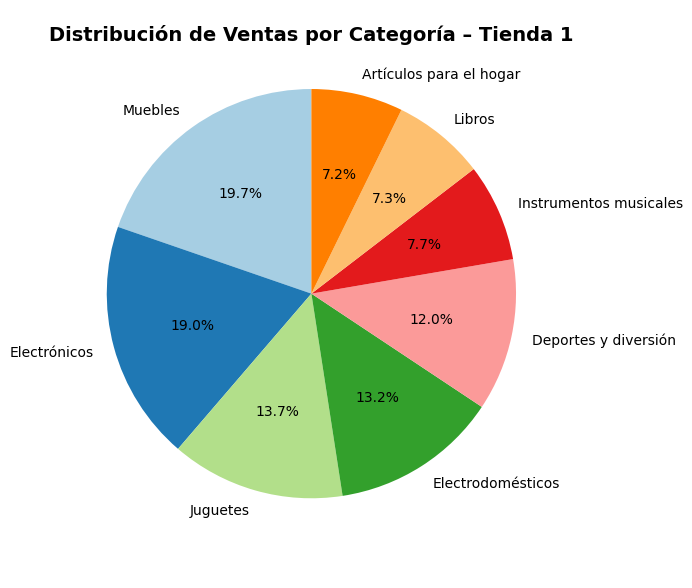

In [ ]:
# Ventas por categoria de Tienda 1
categorias_tienda_1 = ventas_por_categoria(tienda)

# Gráfico de torta
plt.figure(figsize=(7, 6))
plt.pie(categorias_tienda_1, labels=categorias_tienda_1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría – Tienda 1', fontsize=14, fontweight='bold',loc='center',y=0.93)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Porcentaje de Ventas por categoria - Tienda 2

**Categorías más vendidas**
- Muebles
- Electrónicos
- Juguetes

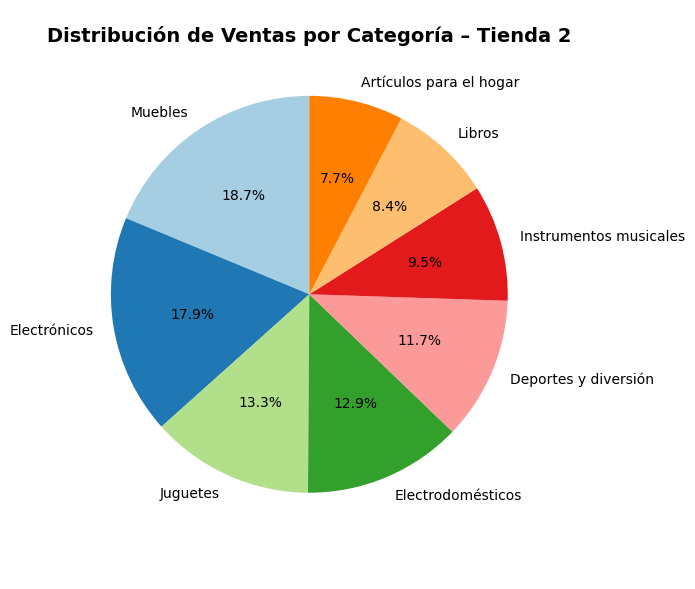

In [ ]:
categorias_tienda_2 = ventas_por_categoria(tienda2)

# Gráfico de torta
plt.figure(figsize=(7, 6))
plt.pie(categorias_tienda_2, labels=categorias_tienda_2.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría – Tienda 2', fontsize=14, fontweight='bold',loc='center',y=0.93)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Porcentaje Venta Categorias - Tienda 3
**Categorías más vendidas**
- Muebles
- Electrónicos
- Juguetes

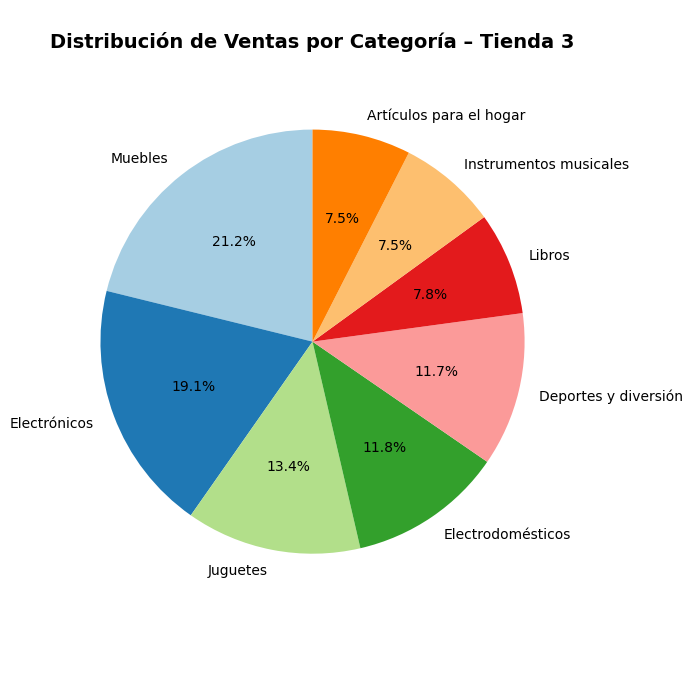

In [ ]:
categorias_tienda_3 = ventas_por_categoria(tienda3)

# Gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(categorias_tienda_3, labels=categorias_tienda_3.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría – Tienda 3', fontsize=14, fontweight='bold',loc='center',y=0.93)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Porcentaje Ventas Categorias - Tienda 4
**Categorías más vendidas**
- Muebles
- Electrónicos
- Juguetes


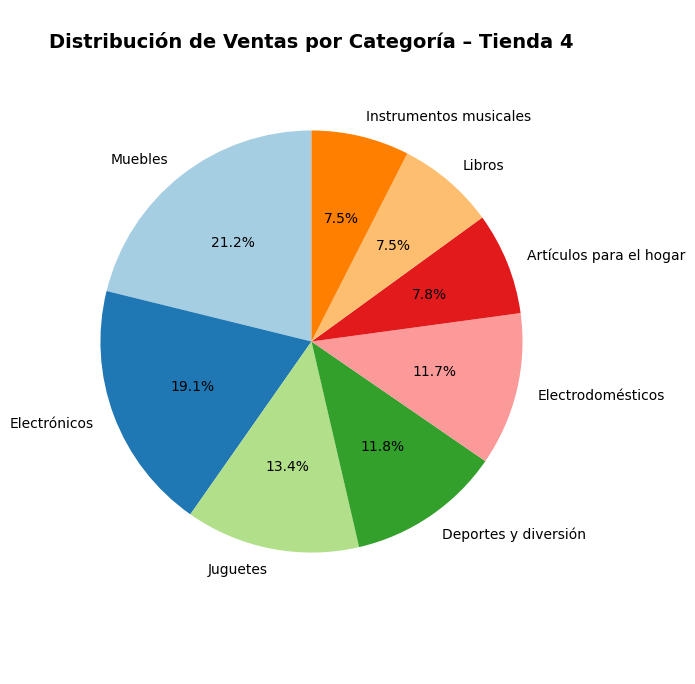

In [ ]:
categorias_tienda_4 = ventas_por_categoria(tienda4)

# Gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(categorias_tienda_3, labels=categorias_tienda_4.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría – Tienda 4', fontsize=14, fontweight='bold',loc='center',y=0.93)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 3. Calificación promedio de la tienda


In [ ]:
def promediar_calificacion(nombre_tienda):
  return nombre_tienda['Calificación'].mean().round(2)

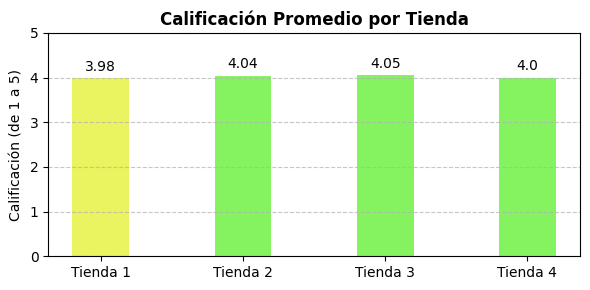

In [ ]:
import matplotlib.pyplot as plt

# Calificaciones promedio
promedios = [
    promediar_calificacion(tienda),
    promediar_calificacion(tienda2),
    promediar_calificacion(tienda3),
    promediar_calificacion(tienda4)
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Asignación de colores según tipo de calificación
colores = []
for valor in promedios:
    if valor >= 4.0:
        colores.append('#85f360')
    elif valor >= 3.0:
        colores.append('#eaf360')
    else:
        colores.append('#f95f58')

# Crear el gráfico
plt.figure(figsize=(6, 3))
plt.bar(nombres_tiendas, promedios, color=colores, width=0.4)
plt.title('Calificación Promedio por Tienda',fontweight='bold')
plt.ylabel('Calificación (de 1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor arriba de cada barra
for i, valor in enumerate(promedios):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 4. Productos más y menos vendidos

In [ ]:
def obtener_top_productos(nombre_tienda, top=5, descendente=True):
    cantidad_vendidos = nombre_tienda['Producto'].value_counts(ascending=not descendente)
    df = cantidad_vendidos.head(top).reset_index()
    df.columns = ['Producto', 'Cantidad Vendida']
    return df

mas_vendidos_1 = obtener_top_productos(tienda)
mas_vendidos_2 = obtener_top_productos(tienda2)
mas_vendidos_3 = obtener_top_productos(tienda3)
mas_vendidos_4 = obtener_top_productos(tienda4)

menos_vendidos_1 = obtener_top_productos(tienda, descendente=False)
menos_vendidos_2 = obtener_top_productos(tienda2, descendente=False)
menos_vendidos_3 = obtener_top_productos(tienda3, descendente=False)
menos_vendidos_4 = obtener_top_productos(tienda4, descendente=False)

print("Top 5 Productos más vendidos Tienda 1:")
print(mas_vendidos_1)
print("\nTop 5 Productos más vendidos Tienda 2:")
print(mas_vendidos_2)
print("\nTop 5 Productos más vendidos Tienda 3:")
print(mas_vendidos_3)
print("\nTop 5 Productos más vendidos Tienda 4:")
print(mas_vendidos_4)

print("\nTop 5 Productos menos vendidos Tienda 1:")
print(menos_vendidos_1)
print("\nTop 5 Productos menos vendidos Tienda 2:")
print(menos_vendidos_2)
print("\nTop 5 Productos menos vendidos Tienda 3:")
print(menos_vendidos_3)
print("\nTop 5 Productos menos vendidos Tienda 4:")
print(menos_vendidos_4)

Top 5 Productos más vendidos Tienda 1:
           Producto  Cantidad Vendida
0        Microondas                60
1     TV LED UHD 4K                60
2           Armario                60
3  Secadora de ropa                58
4     Mesa de noche                56

Top 5 Productos más vendidos Tienda 2:
                    Producto  Cantidad Vendida
0  Iniciando en programación                65
1                 Microondas                62
2                    Batería                61
3          Guitarra acústica                58
4                  Pandereta                58

Top 5 Productos más vendidos Tienda 3:
          Producto  Cantidad Vendida
0    Kit de bancas                57
1  Mesa de comedor                56
2        Cama king                56
3     Set de ollas                55
4    Mesa de noche                55

Top 5 Productos más vendidos Tienda 4:
                    Producto  Cantidad Vendida
0                   Cama box                62
1              

### 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio(nombre_tienda):
  return nombre_tienda['Costo de envío'].mean().round(2)

print(f'Envio Promedio Tienda 1: ${calcular_envio_promedio(tienda)}')
print(f'Envio Promedio Tienda 2: ${calcular_envio_promedio(tienda2)}')
print(f'Envio Promedio Tienda 3: ${calcular_envio_promedio(tienda3)}')
print(f'Envio Promedio Tienda 4: ${calcular_envio_promedio(tienda4)}')


Envio Promedio Tienda 1: $26018.61
Envio Promedio Tienda 2: $25216.24
Envio Promedio Tienda 3: $24805.68
Envio Promedio Tienda 4: $23459.46


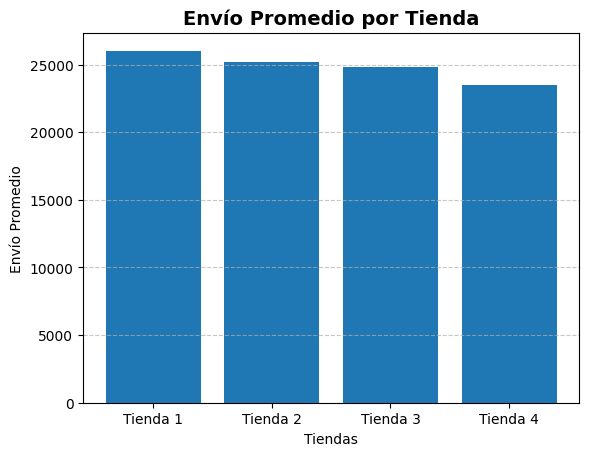

In [ ]:
from matplotlib import pyplot as plt
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_tienda = [calcular_envio_promedio(tienda),
                    calcular_envio_promedio(tienda2),
                    calcular_envio_promedio(tienda3),
                    calcular_envio_promedio(tienda4)]

# Grafico de Barras
plt.title('Envío Promedio por Tienda',fontweight='bold',fontsize=14)
plt.bar(nombres_tiendas, promedios_tienda)
plt.xlabel('Tiendas')
plt.ylabel('Envío Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusión
Teniendo en cuenta todos los aspectos evaluados de las cuatro tiendas, se recomienda la venta de la Tienda 4, ya que ha demostrado un desempeño consistentemente inferior en términos de eficiencia, tanto a lo largo del tiempo como en el inicio del último año reportado.